In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('./Train/Train.csv')

In [3]:
train

feature_1  feature_2  feature_3  feature_4  feature_5      target
0      0.293416  -0.945599  -0.421105   0.406816   0.525662  -82.154667
1     -0.836084  -0.189228  -0.776403  -1.053831   0.597997  -48.897960
2      0.236425   0.132836  -0.147723   0.699854  -0.187364   77.270371
3      0.175312   0.143194  -0.581111  -0.122107  -1.292168   -2.988581
4     -1.693011   0.542712  -2.798729  -0.686723   1.244077  -37.596722
...         ...        ...        ...        ...        ...         ...
1595  -0.274961  -0.820634  -0.757173  -0.147555  -0.307149  -80.110012
1596  -0.076099   0.255257   0.290054   1.796036   0.340350  118.315601
1597   1.044177  -0.899206   1.730399  -1.871057   0.442520 -107.510508
1598  -1.269173  -0.005052   1.857669  -1.080365   0.736334  -47.341558
1599  -1.884000  -0.849427  -1.452270   0.488613   1.459576 -115.939003

[1600 rows x 6 columns]

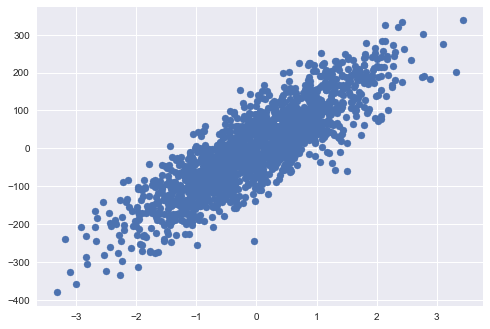

In [4]:
plt.style.use('seaborn')
plt.scatter(train['feature_2'], train['target'])
plt.show()

In [5]:
dataset = train.values

In [6]:
X, Y = dataset[:, :-1], dataset[:,-1]

In [7]:
print(X[:5])
print(Y[:5])

[[ 0.29341624 -0.94559871 -0.42110515  0.40681602  0.52566183]
 [-0.83608408 -0.18922804 -0.77640262 -1.05383124  0.59799685]
 [ 0.23642511  0.13283602 -0.14772298  0.69985396 -0.18736416]
 [ 0.17531181  0.14319424 -0.58111096 -0.12210693 -1.29216807]
 [-1.69301097  0.54271187 -2.79872942 -0.68672304  1.24407683]]
[-82.15466656 -48.89796018  77.2703707   -2.98858081 -37.59672212]


# Mini-Batch Gradient Descent Linear Regression

In [8]:
def hypothesis(X, theta):
    return np.dot(X, theta)

def error(X, Y, theta):
    m = X.shape[0]
    e = 0.0
    
    Y_= hypothesis(X, theta)
    e = np.sum((Y_ - Y)**2)
    
    return e/m
    
def gradient(X, Y, theta):
    m = X.shape[0]
    
    Y_ = hypothesis(X, theta)
    grad = np.dot(X.T, (Y_ - Y))
    
    return grad/m

def batchGradientDescent(X, Y, learning_rate = 0.01, max_epochs = 20, batch_size = 200):
    # Adding X0 to the X
    X0 = np.ones((X.shape[0], 1))
    X = np.hstack((X0, X))

    m = X.shape[0]
    n = X.shape[1]
    total_batch = m//batch_size ## '//' for interger output
    
    theta = np.zeros((n,))
    theta_list = []
    error_list = []
    
    # Data Nomalization
    X = (X - X.mean())/X.std()
    
    ## stacking X and Y to shuffle the data 
    data = np.hstack((X, Y.reshape(-1,1)))
    
    for i in range(max_epochs):
        # randomize X and Y
        np.random.shuffle(data)
        
        for j in range(total_batch):
            batch_X = data[j*batch_size:(j+1)*batch_size, :-1]
            batch_Y = data[j*batch_size:(j+1)*batch_size, -1]
            
            theta = theta - learning_rate * gradient(batch_X, batch_Y, theta)
            theta_list.append(theta)
            
            e = error(X, Y, theta)
            error_list.append(e)
            
    return theta_list, error_list
            

In [21]:
theta_list, error_list = batchGradientDescent(X, Y, max_epochs = 50)

In [22]:
print(len(theta_list), len(error_list))

400 400


In [23]:
X.shape

(1600, 5)

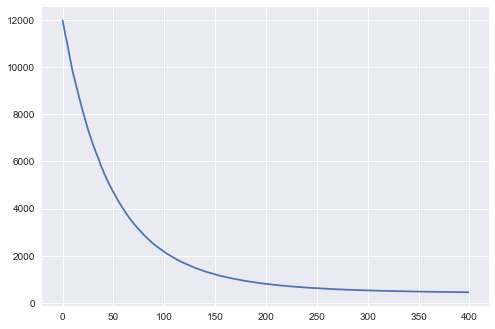

In [24]:
plt.style.use('seaborn')
plt.plot(error_list)
plt.show()

In [48]:
print(theta_list[len(theta_list)-1])

[30.16381131 27.85596799 89.52367228  6.31483507 42.39883404  1.24749512]


# Closed Form Solution

In [44]:
def thetaClosedForm(X, Y):

    n = X.shape[0]
    X0 = np.ones((n,1))
    X = np.hstack((X0, X))
    X = (X - X.mean())/X.std()
    
    Y = Y.reshape((-1, 1))
    Y = np.mat(Y)
    
    firstPart = np.dot(X.T, X)
    secondPart = np.dot(X.T, Y)
    
    theta = np.linalg.pinv(firstPart)*secondPart
    
    return theta

In [45]:
theta = thetaClosedForm(X, Y)

In [53]:
t = np.array(theta)

In [56]:
t[:,0]

array([37.09046246, 29.48547523, 92.04935807,  8.22583053, 44.47152069,
        2.50249268])

# Predictions

In [28]:
X_ = pd.read_csv("./Test/Test.csv")

In [29]:
X_.head()

feature_1  feature_2  feature_3  feature_4  feature_5
0   1.015254   2.076209  -0.266435  -2.418088  -0.980503
1  -0.375021   0.953185   0.626719   0.704406  -0.355489
2  -1.024452   0.962991  -0.407942  -1.861274   0.455201
3  -2.489841   0.544802   0.601219  -0.607021  -1.314286
4  -0.384675  -0.833624   1.358552  -0.547932   0.411925

In [30]:
X_ = X_.values

In [31]:
n = X_.shape[0]
X0 = np.ones((n,1))
X_ = np.hstack((X0, X_))

In [32]:
Y_= hypothesis(X_, theta_list[47])

In [ ]:
thetaClosedForm()

# Accuracy 

In [26]:
def r2_score(X, Y, theta):
    
    n = X.shape[0]
    X0 = np.ones((n,1))
    X = np.hstack((X0, X))
    Y_ = hypothesis(X, theta)
    
    num = np.sum((Y_ - Y)**2)
    denomi = np.sum((Y.mean() - Y)**2)
    
    score = 1 - num/denomi
    
    return score*100

In [27]:
# Batch Gradient
r2_score(X, Y, theta_list[len(theta_list)-1])

91.14353382867816

In [59]:
# Closed Form Accuracy
r2_score(X, Y, t[:,0])

88.18185757892265